In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
student = pd.read_csv('students_mental_health_survey.csv')
student.head(2)

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus


In [4]:
student

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
4,21,Medical,Female,3.35,2,4,3,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,20,Law,Female,3.33,1,1,1,Average,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,3,Moderate,29,Off-Campus
6991,20,Law,Female,3.69,3,1,5,Good,Low,Poor,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
6992,24,Medical,Female,3.73,3,4,1,Good,Moderate,Average,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
6993,26,Others,Male,3.65,4,5,1,Good,High,Poor,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus


In [5]:
student.info(verbose=True, memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6995 entries, 0 to 6994
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6995 non-null   int64  
 1   Course                       6995 non-null   object 
 2   Gender                       6995 non-null   object 
 3   CGPA                         6995 non-null   float64
 4   Stress_Level                 6995 non-null   int64  
 5   Depression_Score             6995 non-null   int64  
 6   Anxiety_Score                6995 non-null   int64  
 7   Sleep_Quality                6995 non-null   object 
 8   Physical_Activity            6995 non-null   object 
 9   Diet_Quality                 6995 non-null   object 
 10  Social_Support               6995 non-null   object 
 11  Relationship_Status          6995 non-null   object 
 12  Substance_Use                6995 non-null   object 
 13  Counseling_Service

In [6]:
student.nunique()

Age                             18
Course                           6
Gender                           2
CGPA                           143
Stress_Level                     6
Depression_Score                 6
Anxiety_Score                    6
Sleep_Quality                    3
Physical_Activity                3
Diet_Quality                     3
Social_Support                   3
Relationship_Status              3
Substance_Use                    3
Counseling_Service_Use           3
Family_History                   2
Chronic_Illness                  2
Financial_Stress                 6
Extracurricular_Involvement      3
Semester_Credit_Load            15
Residence_Type                   3
dtype: int64

In [7]:
#Checking for duplicate rows
student = student.drop_duplicates()


In [8]:
# Transform: Perform data transformations
# For simplicity, let's assume we want to calculate the 'Stress_Level' based on 'Age' and 'Depression_Score'
student['Stress_Level'] = student['Age'] + student['Stress_Level']

# Load: Save the transformed data to a new CSV file
student.to_csv('transforme_data.csv', index=False)  

print("ETL process completed.")


ETL process completed.


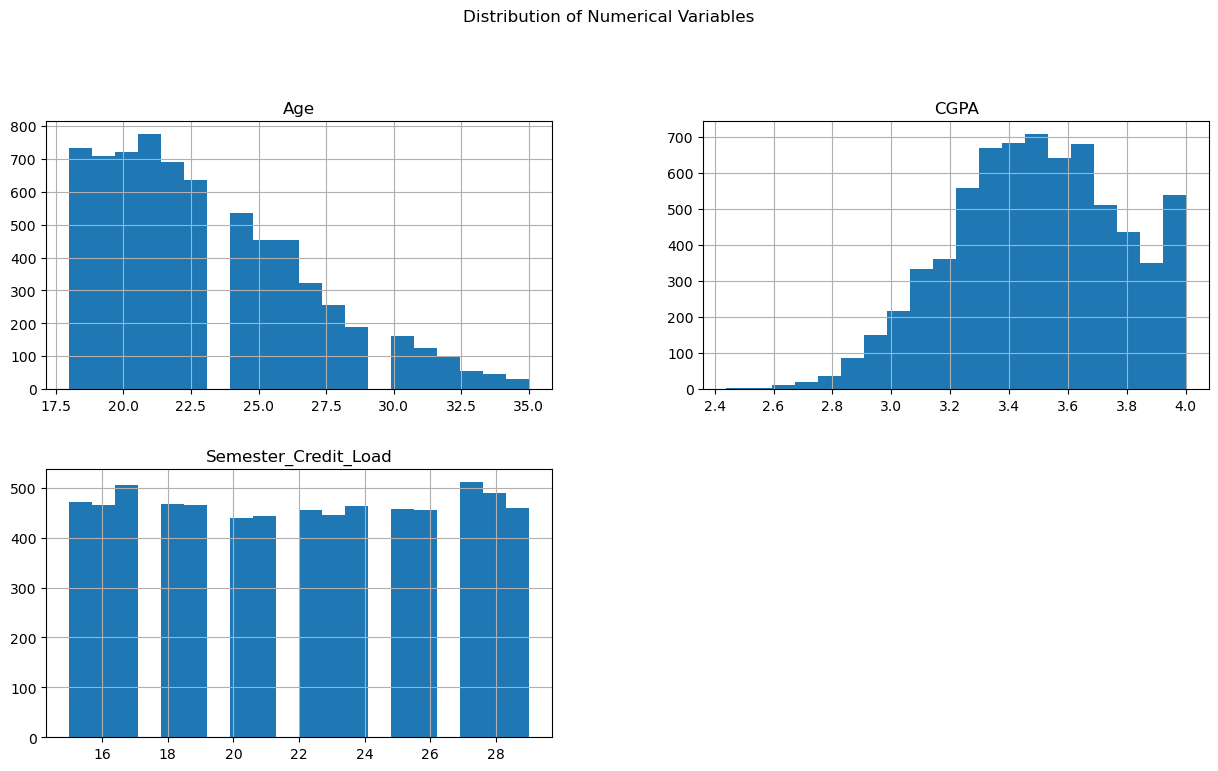

In [9]:
# Distribution visualization for numerical variables
numerical_variables = ['Age', 'CGPA', 'Semester_Credit_Load']
student[numerical_variables].hist(bins=20, figsize=(15, 8))
plt.suptitle('Distribution of Numerical Variables', y=1.02)
plt.show()

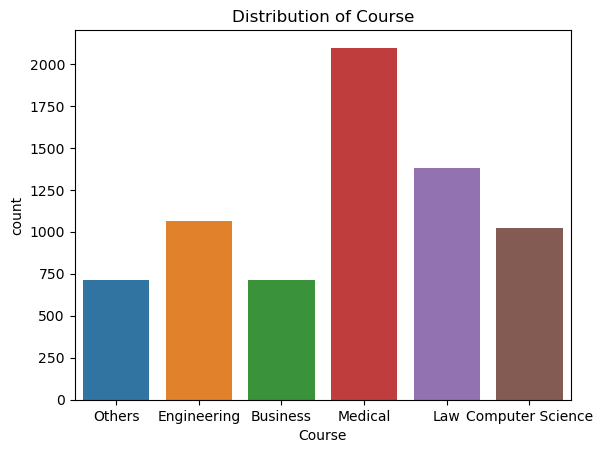

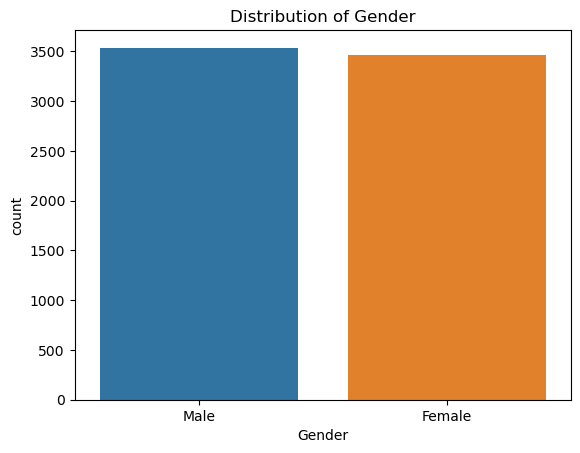

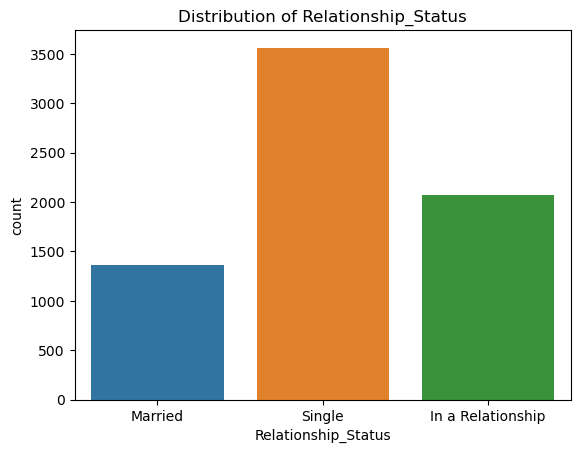

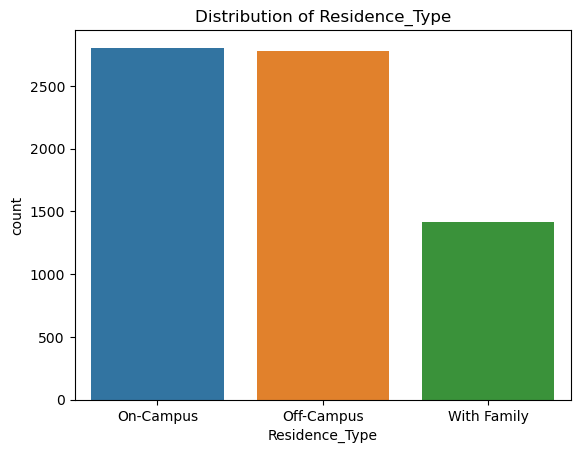

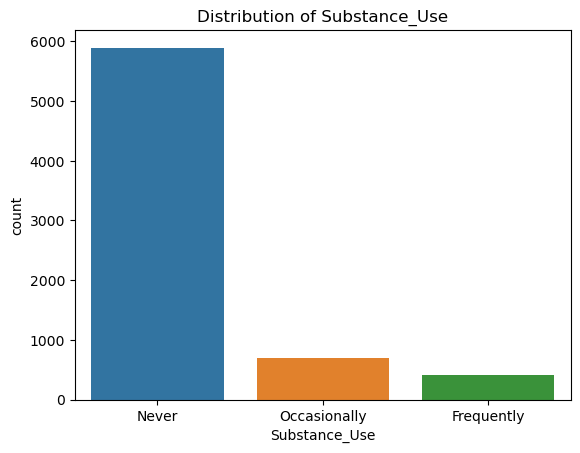

In [10]:
# Bar plots for categorical variables
categorical_variables = ['Course', 'Gender', 'Relationship_Status', 'Residence_Type', 'Substance_Use']
for var in categorical_variables:
    sns.countplot(x=var, data=student)
    plt.title(f'Distribution of {var}')
    plt.show()

<Axes: xlabel='Age', ylabel='CGPA'>

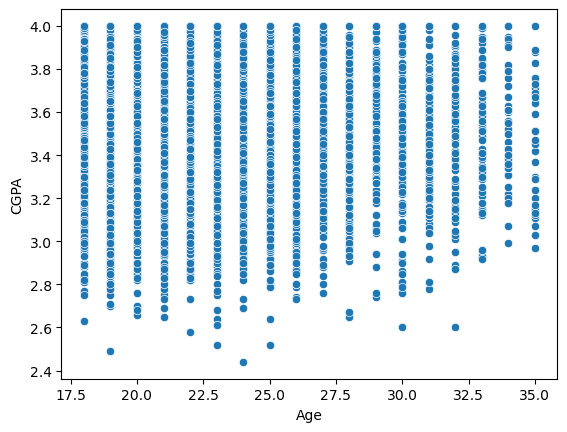

In [11]:
# Scatter plot for Age vs CGPA
sns.scatterplot(x='Age', y='CGPA', data=student)

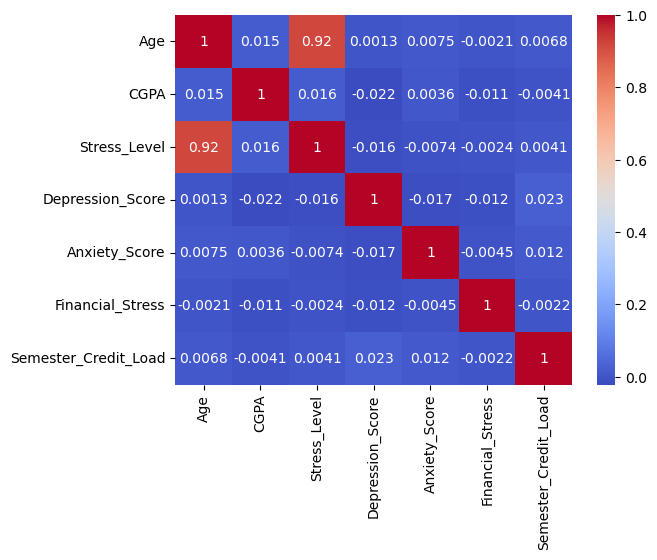

In [12]:
# Select only numeric columns from the DataFrame
numeric_columns = student.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix for numeric columns
correlation_matrix = student[numeric_columns].corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

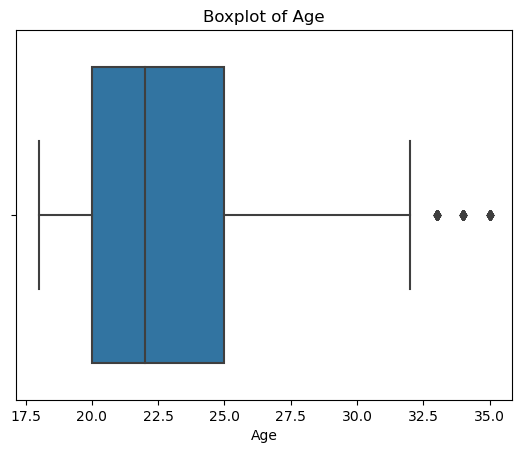

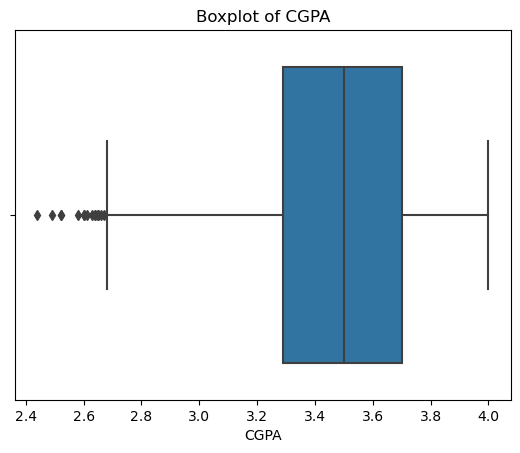

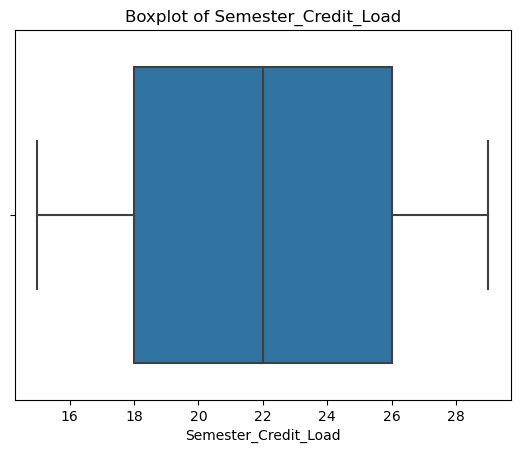

In [13]:
#Box Plots for Outlier Detection
for var in numerical_variables:
    sns.boxplot(x=var, data=student)
    plt.title(f'Boxplot of {var}')
    plt.show()


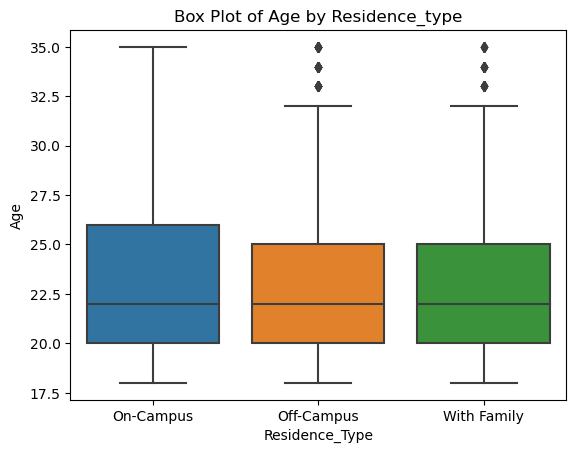

In [14]:

# Box plot
sns.boxplot(x='Residence_Type', y='Age', data=student)
plt.title(f'Box Plot of Age by Residence_type')
plt.show()

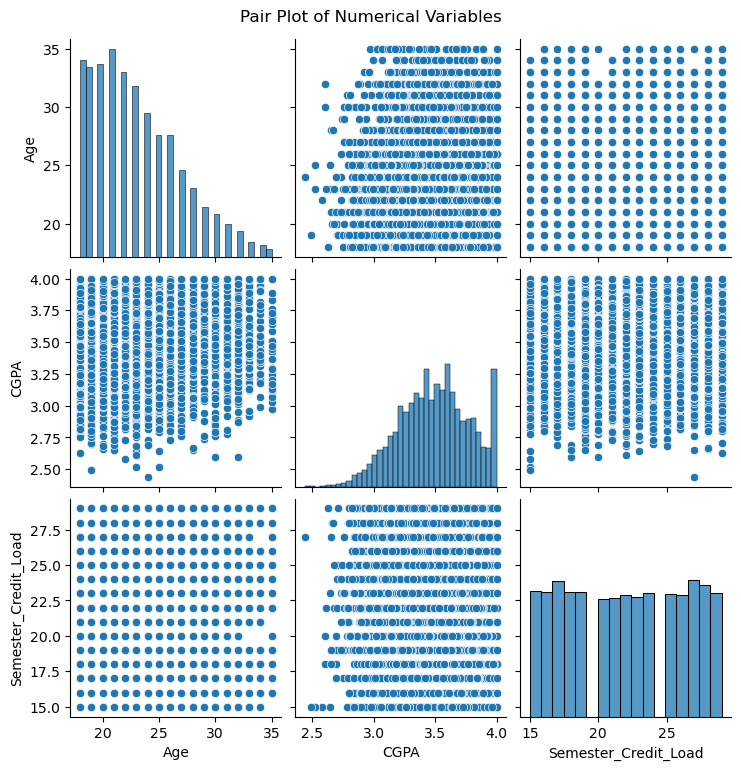

In [15]:
sns.pairplot(student[numerical_variables])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

In [16]:
print(student.describe())

               Age         CGPA  Stress_Level  Depression_Score  \
count  6995.000000  6995.000000   6995.000000       6995.000000   
mean     23.003574     3.491245     25.433024          2.255182   
std       3.856278     0.287363      4.160516          1.624867   
min      18.000000     2.440000     18.000000          0.000000   
25%      20.000000     3.290000     22.000000          1.000000   
50%      22.000000     3.500000     25.000000          2.000000   
75%      25.000000     3.700000     28.000000          3.000000   
max      35.000000     4.000000     40.000000          5.000000   

       Anxiety_Score  Financial_Stress  Semester_Credit_Load  
count    6995.000000       6995.000000           6995.000000  
mean        2.302359          2.453467             22.011008  
std         1.624339          1.709350              4.360574  
min         0.000000          0.000000             15.000000  
25%         1.000000          1.000000             18.000000  
50%         2.0000

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the data
student = pd.read_csv('students_mental_health_survey.csv')

# Drop rows with missing values in the target variable
student.dropna(subset=['Stress_Level'], inplace=True)

# Select features and target variable
features = ['Age', 'CGPA', 'Depression_Score', 'Anxiety_Score', 'Financial_Stress','Substance_Use' ]
target = 'Stress_Level'

X = student[features]
y = student[target]

# Encode categorical variables if present
label_encoder = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
k = 5  # Set the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the KNN model
knn.fit(X_train, y_train)

# Predictions
predictions = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Print accuracy
print(f"Model Accuracy: {accuracy}")

# Generate and print classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

Model Accuracy: 0.1651179413867048
Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.21      0.16       208
           1       0.17      0.21      0.19       261
           2       0.18      0.18      0.18       248
           3       0.23      0.20      0.21       284
           4       0.10      0.07      0.09       195
           5       0.14      0.08      0.10       203

    accuracy                           0.17      1399
   macro avg       0.16      0.16      0.16      1399
weighted avg       0.16      0.17      0.16      1399



C:\Users\Dimple\AppData\Local\Temp\ipykernel_17924\1329785988.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load the data
student = pd.read_csv('students_mental_health_survey.csv')

# Drop rows with missing values in the target variable
student.dropna(subset=['Stress_Level'], inplace=True)

# Select features and target variable
features = [ 'Age', 'CGPA', 'Depression_Score', 'Anxiety_Score', 'Financial_Stress','Substance_Use']
target = 'Stress_Level'

X = student[features]
y = student[target]

# Encode categorical variables if present
label_encoder = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Initialize the model
log_reg.fit(X_train, y_train)  # Fit the model

# Predictions
predictions = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Print accuracy
print(f"Model Accuracy: {accuracy}")

# Generate and print classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

C:\Users\Dimple\AppData\Local\Temp\ipykernel_17924\3910776562.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])


Model Accuracy: 0.20300214438884917
Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.03      0.05       208
           1       0.36      0.04      0.07       261
           2       0.16      0.19      0.17       248
           3       0.22      0.77      0.34       284
           4       0.00      0.00      0.00       195
           5       0.08      0.01      0.02       203

    accuracy                           0.20      1399
   macro avg       0.16      0.17      0.11      1399
weighted avg       0.17      0.20      0.12      1399



C:\Users\Dimple\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimple\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimple\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
